In [1]:
from basicpy import BaSiC
from basicpy import datasets as bdata
from matplotlib import pyplot as plt
import numpy as np

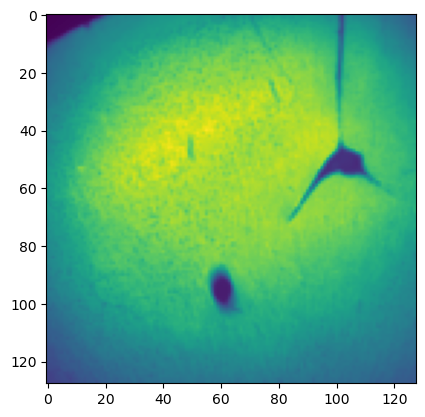

In [2]:
images = bdata.wsi_brain()
plt.imshow(images[12])

In [3]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

CPU times: user 15.8 s, sys: 3.92 s, total: 19.7 s
Wall time: 14.4 s


In [4]:
%%time
images_transformed = basic.transform(images)

CPU times: user 3.74 ms, sys: 1.92 ms, total: 5.67 ms
Wall time: 3.79 ms


In [5]:
images.shape, images_transformed.shape

((63, 128, 128), (63, 128, 128))

In [6]:
basic.flatfield.shape, basic.darkfield.shape

((128, 128), (128, 128))

In [7]:
F = basic.flatfield
D = basic.darkfield

In [8]:
T = images_transformed 
O = images

In [9]:
i = 12
np.all(D+T[i]*F-O[i] < 1e-3)

True

In [10]:
np.all(D+T*F-O < 1e-2)

True

In [11]:
T.shape, F.shape

((63, 128, 128), (128, 128))

In [14]:
np.all(T - (O-D)/F < 1e-2)

True

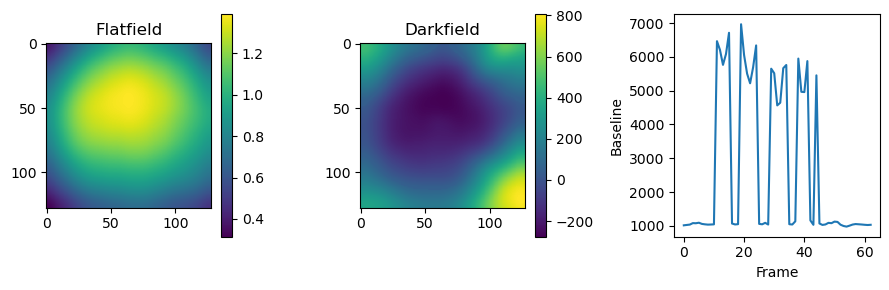

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

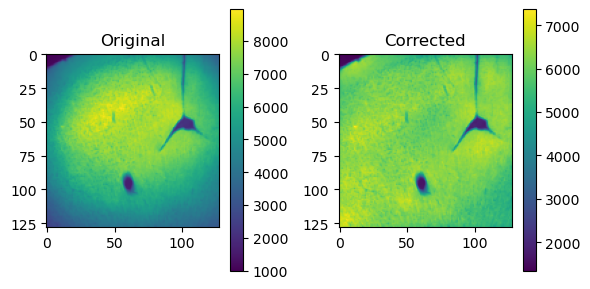

In [13]:
i = 12
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()